In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
base_credit = pd.read_csv('credit_risk_dataset.csv')
base_credit = base_credit.dropna()
base_credit = base_credit[base_credit['person_age'] <= 84]

In [6]:
X_credit = base_credit.drop(columns=['loan_status'])
X_credit

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,N,26


In [7]:
X_credit.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

In [8]:
X_credit = X_credit.values

In [9]:
type(X_credit)

numpy.ndarray

In [10]:
X_credit

array([[22, 59000, 'RENT', ..., 0.59, 'Y', 3],
       [21, 9600, 'OWN', ..., 0.1, 'N', 2],
       [25, 9600, 'MORTGAGE', ..., 0.57, 'N', 3],
       ...,
       [65, 76000, 'RENT', ..., 0.46, 'N', 28],
       [56, 150000, 'MORTGAGE', ..., 0.1, 'N', 26],
       [66, 42000, 'RENT', ..., 0.15, 'N', 30]], dtype=object)

In [11]:
y_credit = base_credit.iloc[:, 8].values

In [12]:
y_credit

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

## Label Encoder

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder_teste = LabelEncoder()

In [14]:
X_credit[0]

array([22, 59000, 'RENT', 123.0, 'PERSONAL', 'D', 35000, 16.02, 0.59, 'Y',
       3], dtype=object)

In [15]:
label_encoder_person_home_ownership = LabelEncoder()
label_encoder_loan_intent = LabelEncoder()
label_encoder_loan_grade = LabelEncoder()
label_encoder_cb_person_default_on_file = LabelEncoder()

In [16]:
X_credit[:,2] = label_encoder_person_home_ownership.fit_transform(X_credit[:,2])
X_credit[:,4] = label_encoder_loan_intent.fit_transform(X_credit[:,2])
X_credit[:,5] = label_encoder_loan_grade.fit_transform(X_credit[:,5])
X_credit[:,9] = label_encoder_cb_person_default_on_file.fit_transform(X_credit[:,9])

In [17]:
X_credit[0]

array([22, 59000, 3, 123.0, 3, 3, 35000, 16.02, 0.59, 1, 3], dtype=object)

In [18]:
X_credit

array([[22, 59000, 3, ..., 0.59, 1, 3],
       [21, 9600, 2, ..., 0.1, 0, 2],
       [25, 9600, 0, ..., 0.57, 0, 3],
       ...,
       [65, 76000, 3, ..., 0.46, 0, 28],
       [56, 150000, 0, ..., 0.1, 0, 26],
       [66, 42000, 3, ..., 0.15, 0, 30]], dtype=object)

## OneHot Encoding 

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [21]:
onehotencoder_credit = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [0,2,4,5,9,10])], remainder='passthrough')

In [22]:
X_credit = onehotencoder_credit.fit_transform(X_credit).toarray()

In [23]:
X_credit

array([[0.000e+00, 0.000e+00, 1.000e+00, ..., 3.500e+04, 1.602e+01,
        5.900e-01],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 1.000e+03, 1.114e+01,
        1.000e-01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 5.500e+03, 1.287e+01,
        5.700e-01],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 3.500e+04, 1.099e+01,
        4.600e-01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.500e+04, 1.148e+01,
        1.000e-01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 6.475e+03, 9.990e+00,
        1.500e-01]])

In [24]:
X_credit.shape

(28634, 106)

## Scaling of Values

In [25]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
X_credit = scaler_credit.fit_transform(X_credit)

In [26]:
X_credit[0]

array([-2.21171520e-02, -1.96162362e-01,  2.83774523e+00, -3.67863749e-01,
       -3.50322490e-01, -3.22661485e-01, -2.88560441e-01, -2.65612440e-01,
       -2.45205790e-01, -2.34540033e-01, -2.02320406e-01, -1.91016667e-01,
       -1.75966506e-01, -1.64899514e-01, -1.49379571e-01, -1.41106176e-01,
       -1.30848543e-01, -1.20377322e-01, -1.06477923e-01, -9.75659199e-02,
       -9.11616388e-02, -8.75884366e-02, -7.61300063e-02, -7.05964243e-02,
       -6.37777894e-02, -5.64639020e-02, -5.48859748e-02, -5.15873123e-02,
       -4.76989873e-02, -3.78671017e-02, -3.96740718e-02, -3.39677172e-02,
       -3.39677172e-02, -3.01469184e-02, -2.70911818e-02, -2.50802458e-02,
       -2.21171520e-02, -2.28938273e-02, -2.43731920e-02, -1.32154487e-02,
       -2.13122486e-02, -1.67172432e-02, -1.44770516e-02, -1.02362850e-02,
       -1.56372760e-02, -1.32154487e-02, -1.67172432e-02, -5.90971549e-03,
       -1.32154487e-02, -1.32154487e-02, -8.35774575e-03, -5.90971549e-03,
       -5.90971549e-03, -

## Division into Training and Testing 

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_credit_train, X_credit_test, y_credit_train, y_credit_test = train_test_split(X_credit, y_credit, test_size = 0.15, random_state = 0)

In [29]:
X_credit_train.shape

(24338, 106)

In [30]:
y_credit_train.shape

(24338,)

In [31]:
X_credit_test.shape, y_credit_test.shape

((4296, 106), (4296,))

## Naive Bayes 

In [32]:
from sklearn.naive_bayes import GaussianNB
naive_credit = GaussianNB()
naive_credit.fit(X_credit_train, y_credit_train)
predictions = naive_credit.predict(X_credit_test)
predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [33]:
y_credit_test

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [35]:
accuracy_score(y_credit_test, predictions) 

0.22136871508379888

In [36]:
confusion_matrix(y_credit_test, predictions)

array([[  34, 3333],
       [  12,  917]], dtype=int64)

In [39]:
from yellowbrick.classifier import ConfusionMatrix

0.22136871508379888

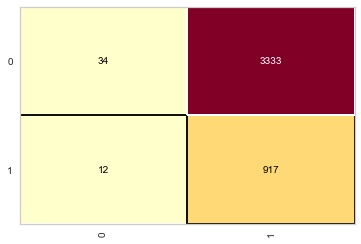

In [40]:
cm = ConfusionMatrix(naive_credit)
cm.fit(X_credit_train, y_credit_train)
cm.score(X_credit_test, y_credit_test)

In [41]:
print(classification_report(y_credit_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.01      0.02      3367
           1       0.22      0.99      0.35       929

    accuracy                           0.22      4296
   macro avg       0.48      0.50      0.19      4296
weighted avg       0.63      0.22      0.09      4296



## Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
credit_tree = DecisionTreeClassifier(criterion='entropy')
credit_tree.fit(X_credit_train, y_credit_train)

DecisionTreeClassifier(criterion='entropy')

In [44]:
predictions = credit_tree.predict(X_credit_test)
predictions

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [45]:
accuracy_score(y_credit_test, predictions) 

0.8703445065176909

0.8703445065176909

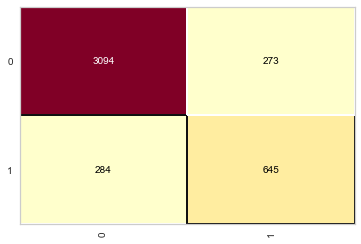

In [46]:
cm = ConfusionMatrix(credit_tree)
cm.fit(X_credit_train, y_credit_train)
cm.score(X_credit_test, y_credit_test)

In [47]:
print(classification_report(y_credit_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3367
           1       0.70      0.69      0.70       929

    accuracy                           0.87      4296
   macro avg       0.81      0.81      0.81      4296
weighted avg       0.87      0.87      0.87      4296



## XGBoost 

In [48]:
from xgboost import XGBClassifier

In [49]:
xgboost = XGBClassifier(n_estimators=1000, max_depth=15, learning_rate=0.05, objective='binary:logistic', random_state=10)
xgboost.fit(X_credit_train, y_credit_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=10, ...)

In [50]:
xgboost.score(X_credit_train, y_credit_train)

0.9999589119894815

In [51]:
xgboost.score(X_credit_test, y_credit_test)

0.9089851024208566

In [52]:
predictions_test = xgboost.predict(X_credit_test)

In [53]:
predictions_test

array([1, 0, 0, ..., 1, 0, 0])

In [54]:
y_credit_test

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [55]:
accuracy_score(y_credit_test, predictions) 

0.8703445065176909

0.9089851024208566

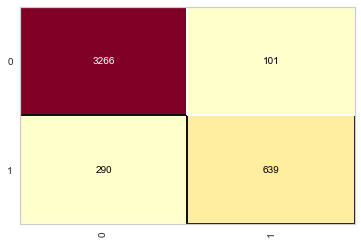

In [56]:
cm = ConfusionMatrix(xgboost)
cm.fit(X_credit_train, y_credit_train)
cm.score(X_credit_test, y_credit_test)

In [57]:
print(classification_report(y_credit_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3367
           1       0.70      0.69      0.70       929

    accuracy                           0.87      4296
   macro avg       0.81      0.81      0.81      4296
weighted avg       0.87      0.87      0.87      4296



## CATBoost

In [58]:
from catboost import CatBoostClassifier

In [60]:
df_cat = pd.read_csv('credit_risk_dataset.csv')

In [61]:
df_cat

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [62]:
result = df_cat.iloc[:, 8]
result

0        1
1        0
2        1
3        1
4        1
        ..
32576    0
32577    0
32578    1
32579    0
32580    0
Name: loan_status, Length: 32581, dtype: int64

In [63]:
predictions_cat =  df_cat.drop(columns=['loan_status'])
predictions_cat

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,N,26


In [64]:
x_train, x_test, y_train, y_test = train_test_split(predictions_cat, result, test_size = 0.3, random_state = 0)

In [65]:
categorics = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

In [66]:
catboost = CatBoostClassifier(task_type='CPU', iterations=140, learning_rate=0.1, depth = 5, random_state = 5, 
                              eval_metric="Accuracy")

In [67]:
catboost.fit( x_train, y_train, cat_features= categorics, plot=True, eval_set=(x_test, y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8340788	test: 0.8395908	best: 0.8395908 (0)	total: 172ms	remaining: 23.9s
1:	learn: 0.8365781	test: 0.8424552	best: 0.8424552 (1)	total: 193ms	remaining: 13.3s
2:	learn: 0.8506533	test: 0.8557545	best: 0.8557545 (2)	total: 217ms	remaining: 9.91s
3:	learn: 0.8526703	test: 0.8572890	best: 0.8572890 (3)	total: 239ms	remaining: 8.14s
4:	learn: 0.8538542	test: 0.8579028	best: 0.8579028 (4)	total: 264ms	remaining: 7.13s
5:	learn: 0.8509164	test: 0.8559591	best: 0.8579028 (4)	total: 294ms	remaining: 6.56s
6:	learn: 0.8505656	test: 0.8553453	best: 0.8579028 (4)	total: 328ms	remaining: 6.24s
7:	learn: 0.8507849	test: 0.8554476	best: 0.8579028 (4)	total: 364ms	remaining: 6.01s
8:	learn: 0.8549066	test: 0.8582097	best: 0.8582097 (8)	total: 396ms	remaining: 5.76s
9:	learn: 0.8620538	test: 0.8656777	best: 0.8656777 (9)	total: 422ms	remaining: 5.49s
10:	learn: 0.8746821	test: 0.8785678	best: 0.8785678 (10)	total: 447ms	remaining: 5.24s
11:	learn: 0.8786723	test: 0.8839898	best: 0.8839898

95:	learn: 0.9315969	test: 0.9332992	best: 0.9334015 (92)	total: 2.84s	remaining: 1.3s
96:	learn: 0.9315969	test: 0.9331969	best: 0.9334015 (92)	total: 2.87s	remaining: 1.27s
97:	learn: 0.9317285	test: 0.9335038	best: 0.9335038 (97)	total: 2.89s	remaining: 1.24s
98:	learn: 0.9316846	test: 0.9338107	best: 0.9338107 (98)	total: 2.93s	remaining: 1.21s
99:	learn: 0.9318162	test: 0.9336061	best: 0.9338107 (98)	total: 2.96s	remaining: 1.19s
100:	learn: 0.9321670	test: 0.9338107	best: 0.9338107 (98)	total: 3s	remaining: 1.16s
101:	learn: 0.9321231	test: 0.9338107	best: 0.9338107 (98)	total: 3.04s	remaining: 1.13s
102:	learn: 0.9319477	test: 0.9339130	best: 0.9339130 (102)	total: 3.1s	remaining: 1.11s
103:	learn: 0.9321231	test: 0.9339130	best: 0.9339130 (102)	total: 3.12s	remaining: 1.08s
104:	learn: 0.9320354	test: 0.9340153	best: 0.9340153 (104)	total: 3.15s	remaining: 1.05s
105:	learn: 0.9320354	test: 0.9340153	best: 0.9340153 (104)	total: 3.17s	remaining: 1.02s
106:	learn: 0.9320354	test:

In [68]:
predictions_cat = catboost.predict(x_test)
predictions_cat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [69]:
result

0        1
1        0
2        1
3        1
4        1
        ..
32576    0
32577    0
32578    1
32579    0
32580    0
Name: loan_status, Length: 32581, dtype: int64

In [70]:
print("Accuracy: %.2f%%" % (accuracy_score(y_test, predictions_cat) * 100.0))

Accuracy: 93.41%


In [71]:
confusion_matrix(y_test, predictions_cat)

array([[7675,   69],
       [ 575, 1456]], dtype=int64)

In [72]:
print(classification_report(y_test, predictions_cat))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7744
           1       0.95      0.72      0.82      2031

    accuracy                           0.93      9775
   macro avg       0.94      0.85      0.89      9775
weighted avg       0.94      0.93      0.93      9775



##  KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
knn_credit = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
knn_credit.fit(X_credit_train, y_credit_train)

KNeighborsClassifier()

In [75]:
predictions_knn = knn_credit.predict(X_credit_test)
predictions_knn

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [76]:
y_credit_test

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [77]:
accuracy_score(y_credit_test, predictions_knn) 

0.8538175046554934

0.8538175046554934

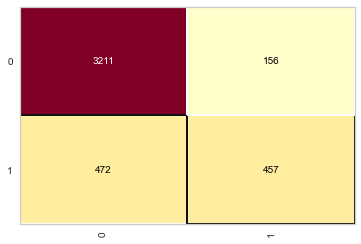

In [78]:
cm = ConfusionMatrix(knn_credit)
cm.fit(X_credit_train, y_credit_train)
cm.score(X_credit_test, y_credit_test)

In [79]:
print(classification_report(y_credit_test, predictions_knn))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      3367
           1       0.75      0.49      0.59       929

    accuracy                           0.85      4296
   macro avg       0.81      0.72      0.75      4296
weighted avg       0.84      0.85      0.84      4296



## SVM 

In [80]:
from sklearn.svm import SVC

In [81]:
svm_credit = SVC(kernel='rbf', random_state=1, C = 2.0) # 2 -> 4
svm_credit.fit(X_credit_train, y_credit_train)

SVC(C=2.0, random_state=1)

In [82]:
predictions_svm = svm_credit.predict(X_credit_test)
predictions_svm

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [83]:
y_credit_test

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [84]:
accuracy_score(y_credit_test, predictions_svm)

0.8789571694599627

0.8789571694599627

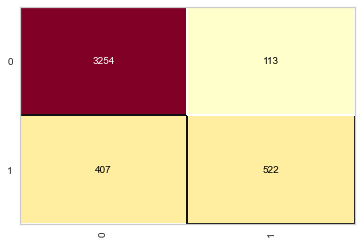

In [85]:
cm = ConfusionMatrix(svm_credit)
cm.fit(X_credit_train, y_credit_train)
cm.score(X_credit_test, y_credit_test)

In [86]:
print(classification_report(y_credit_test, predictions_svm))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      3367
           1       0.82      0.56      0.67       929

    accuracy                           0.88      4296
   macro avg       0.86      0.76      0.80      4296
weighted avg       0.87      0.88      0.87      4296



## Artificial Neural Network 

In [87]:
from sklearn.neural_network import MLPClassifier

In [88]:
rede_neural_credit = MLPClassifier(max_iter=1500, verbose=True, tol=0.0000100,
                                   solver = 'adam', activation = 'relu',
                                   hidden_layer_sizes = (20,20))
rede_neural_credit.fit(X_credit_train, y_credit_train)

Iteration 1, loss = 0.48778439
Iteration 2, loss = 0.37222255
Iteration 3, loss = 0.34661688
Iteration 4, loss = 0.33442844
Iteration 5, loss = 0.32610983
Iteration 6, loss = 0.32037411
Iteration 7, loss = 0.31640489
Iteration 8, loss = 0.31244859
Iteration 9, loss = 0.30886055
Iteration 10, loss = 0.30554463
Iteration 11, loss = 0.30220648
Iteration 12, loss = 0.29922387
Iteration 13, loss = 0.29642603
Iteration 14, loss = 0.29435321
Iteration 15, loss = 0.29220983
Iteration 16, loss = 0.28957201
Iteration 17, loss = 0.28791212
Iteration 18, loss = 0.28639113
Iteration 19, loss = 0.28467835
Iteration 20, loss = 0.28349009
Iteration 21, loss = 0.28185535
Iteration 22, loss = 0.28049292
Iteration 23, loss = 0.27937536
Iteration 24, loss = 0.27801061
Iteration 25, loss = 0.27730303
Iteration 26, loss = 0.27589045
Iteration 27, loss = 0.27522787
Iteration 28, loss = 0.27469452
Iteration 29, loss = 0.27319905
Iteration 30, loss = 0.27241759
Iteration 31, loss = 0.27177587
Iteration 32, los

Iteration 254, loss = 0.22807516
Iteration 255, loss = 0.22826557
Iteration 256, loss = 0.22753837
Iteration 257, loss = 0.22807815
Iteration 258, loss = 0.22756883
Iteration 259, loss = 0.22753847
Iteration 260, loss = 0.22729462
Iteration 261, loss = 0.22730209
Iteration 262, loss = 0.22798405
Iteration 263, loss = 0.22704508
Iteration 264, loss = 0.22765264
Iteration 265, loss = 0.22709171
Iteration 266, loss = 0.22707453
Iteration 267, loss = 0.22739877
Iteration 268, loss = 0.22717775
Iteration 269, loss = 0.22676855
Iteration 270, loss = 0.22654167
Iteration 271, loss = 0.22660862
Iteration 272, loss = 0.22819446
Iteration 273, loss = 0.22747450
Iteration 274, loss = 0.22711066
Iteration 275, loss = 0.22655616
Iteration 276, loss = 0.22594561
Iteration 277, loss = 0.22593427
Iteration 278, loss = 0.22654331
Iteration 279, loss = 0.22649746
Iteration 280, loss = 0.22621932
Iteration 281, loss = 0.22631958
Iteration 282, loss = 0.22660361
Iteration 283, loss = 0.22572135
Iteration 

MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=1500, tol=1e-05,
              verbose=True)

In [89]:
predictions_neural = rede_neural_credit.predict(X_credit_test)
predictions_neural

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [90]:
y_credit_test

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [91]:
accuracy_score(y_credit_test, predictions_neural)

0.8777932960893855

0.8777932960893855

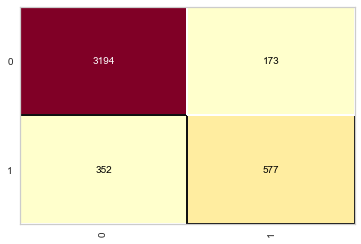

In [92]:
cm = ConfusionMatrix(rede_neural_credit)
cm.fit(X_credit_train, y_credit_train)
cm.score(X_credit_test, y_credit_test)

In [93]:
print(classification_report(y_credit_test, predictions_neural))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      3367
           1       0.77      0.62      0.69       929

    accuracy                           0.88      4296
   macro avg       0.84      0.78      0.81      4296
weighted avg       0.87      0.88      0.87      4296

